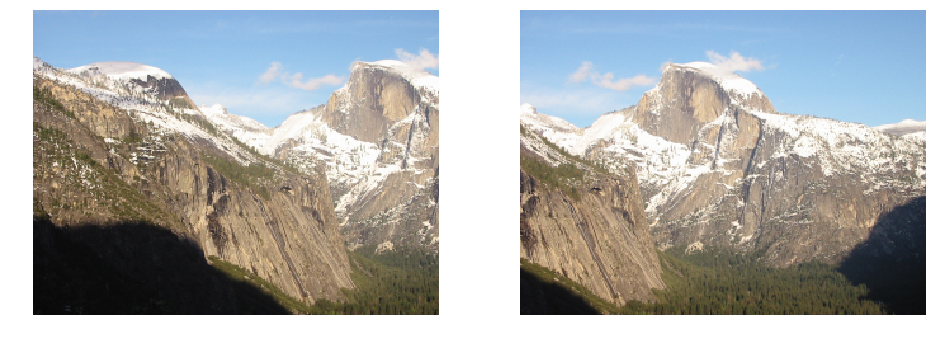

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

images = [cv2.imread('datas/yosemite_test/yosemite1.jpg'), cv2.imread('datas/yosemite_test/yosemite2.jpg')]
images = [cv2.resize(im, (320, 240)) for im in images]

fig = plt.figure(figsize=(16, 6))
for i, image in enumerate(images):
    ax = fig.add_subplot(1, 2, i+1)
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    _ = ax.axis("off")

## test datas

#images:2 #features:image0:629 image1:547 #matches:238 elapsed time: extraction:0.0890sec computation:0.0710sec


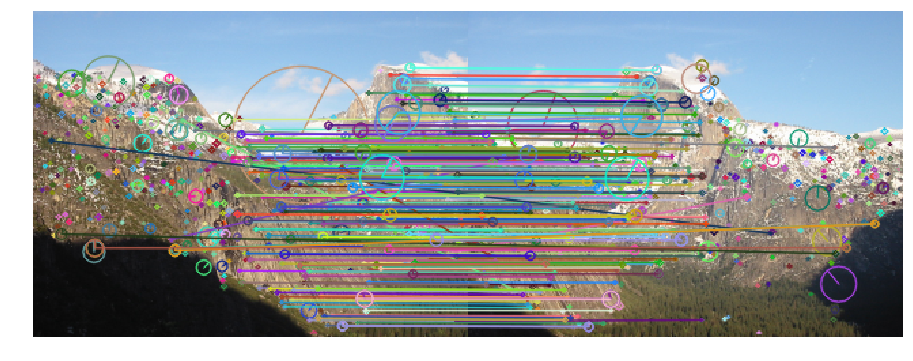

In [2]:
detector = cv2.xfeatures2d.SIFT_create()

timestamps = []
timestamps.append( ('init', time.time()) )
keypoints = [detector.detect(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), None) for image in images]
timestamps.append( ('extraction', time.time()) )
descriptors = [detector.compute(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), kp)[1] for image, kp in zip(images, keypoints)]
timestamps.append( ('computation', time.time()) )

matcher = cv2.BFMatcher()
matches = matcher.knnMatch(descriptors[0], descriptors[1], k=2)

good = []
for m,n in matches:
    if m.distance < 0.80*n.distance:
        good.append([m])
        
result = cv2.drawMatchesKnn(images[0], keypoints[0], images[1], keypoints[1], good, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, ax = plt.subplots(figsize=(16, 6))
ax.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
_ = ax.axis("off")


print('#images:{} #features:{} #matches:{} elapsed time: {}'.format(
    len(images),
    ' '.join( ['image{}:{}'.format(i, len(kp)) for i, kp in enumerate(keypoints)] ),
    len(good),
    ' '.join( ['{}:{:.4f}sec'.format(t[0], t[1]-timestamps[i][1]) for i, t in enumerate(timestamps[1:])]) ))

In [3]:
points0 = np.float32([ keypoints[0][m[0].queryIdx].pt for m in good ]).reshape(-1,1,2)
points1 = np.float32([ keypoints[1][m[0].trainIdx].pt for m in good ]).reshape(-1,1,2)

M, mask = cv2.findHomography(points0, points1, cv2.RANSAC,5.0)

n1, n2 = len(good), len([idx for idx, m in enumerate(mask) if m])
print('ratio match results:{}, inliers:{} ratio:{:.4f}'.format(n1, n2, 1.0*n2/n1))

ratio match results:238, inliers:226 ratio:0.9496


## histogram response and size without matches

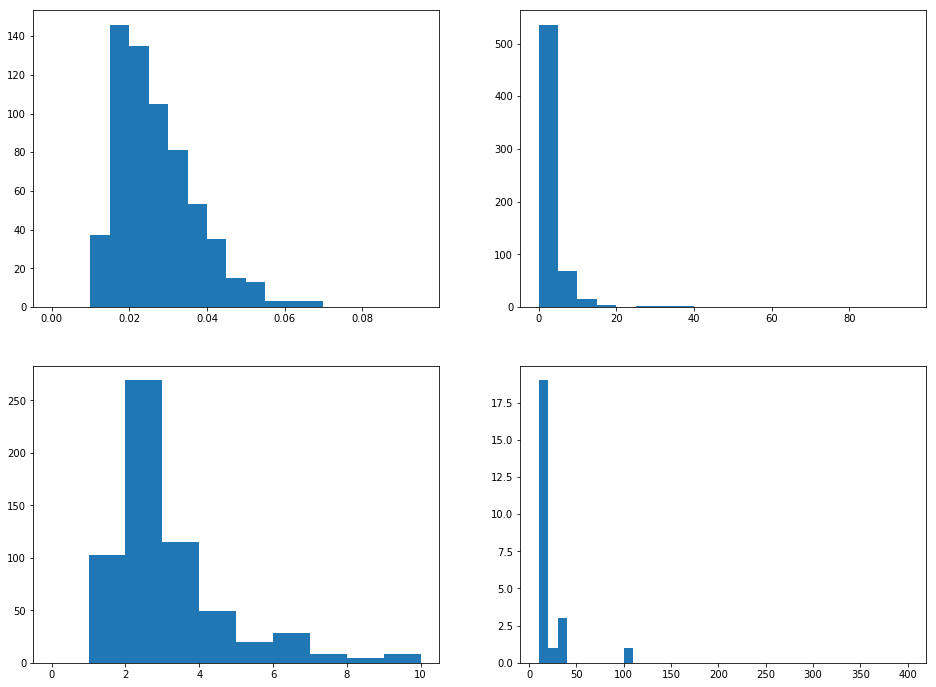

In [4]:
responses = [kp.response for kp in keypoints[0]]
sizes = [kp.size for kp in keypoints[0]]

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(2, 2, 1)
_ = ax.hist(responses, bins=[k*0.005 for k in range(20)])
ax = fig.add_subplot(2, 2, 2)
_ = ax.hist(sizes, bins=[k*5 for k in range(20)])
ax = fig.add_subplot(2, 2, 3)
_ = ax.hist(sizes, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax = fig.add_subplot(2, 2, 4)
_ = ax.hist(sizes, bins=[(k+1)*10 for k in range(40)])

## histogram response and size with matches

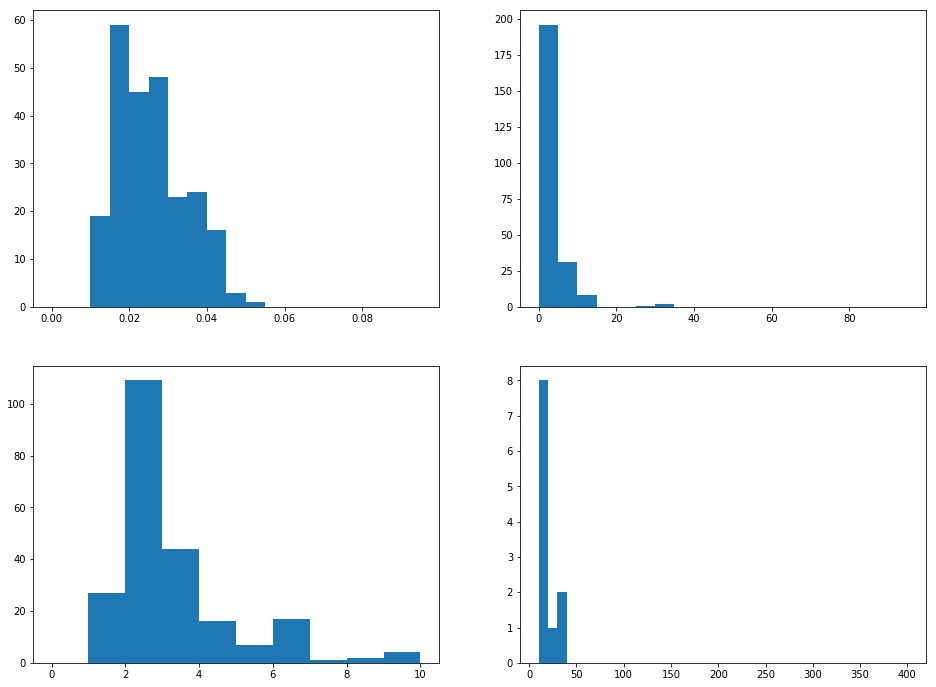

In [5]:
new_keypoints=[[], []]
new_keypoints[0] = [ keypoints[0][m[0].queryIdx] for m in good ]
new_keypoints[1] = [ keypoints[1][m[0].trainIdx] for m in good ]

responses = [kp.response for kp in new_keypoints[0]]
sizes = [kp.size for kp in new_keypoints[0]]

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(2, 2, 1)
_ = ax.hist(responses, bins=[k*0.005 for k in range(20)])
ax = fig.add_subplot(2, 2, 2)
_ = ax.hist(sizes, bins=[k*5 for k in range(20)])
ax = fig.add_subplot(2, 2, 3)
_ = ax.hist(sizes, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax = fig.add_subplot(2, 2, 4)
_ = ax.hist(sizes, bins=[(k+1)*10 for k in range(40)])

## match filtered keypoints

#images:2 #features:image0:474 image1:412 #matches:178 elapsed time: extraction:0.0488sec computation:0.0340sec


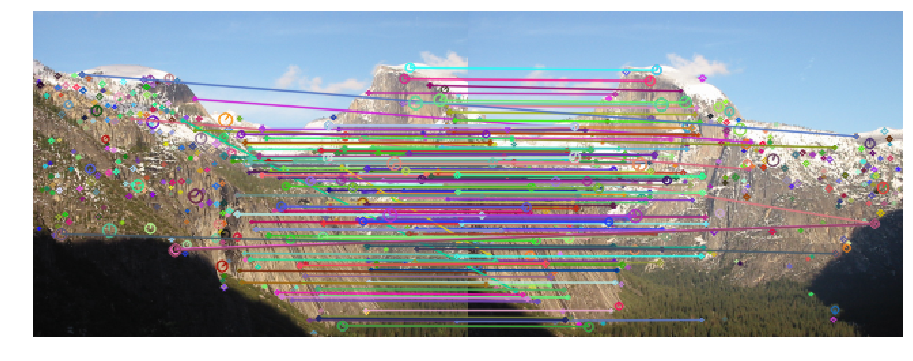

In [6]:
detector = cv2.xfeatures2d.SIFT_create()

timestamps = []
timestamps.append( ('init', time.time()) )
keypoints = [
    [kp for kp in detector.detect(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), None)
        if kp.response>=0.015 and kp.size>=2.0 and kp.size<=10]
    for image in images]
timestamps.append( ('extraction', time.time()) )
descriptors = [detector.compute(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), kp)[1] for image, kp in zip(images, keypoints)]
timestamps.append( ('computation', time.time()) )

matcher = cv2.BFMatcher()
matches = matcher.knnMatch(descriptors[0], descriptors[1], k=2)

good = []
for m,n in matches:
    if m.distance < 0.80*n.distance:
        good.append([m])
        
result = cv2.drawMatchesKnn(images[0], keypoints[0], images[1], keypoints[1], good, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, ax = plt.subplots(figsize=(16, 6))
ax.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
_ = ax.axis("off")

print('#images:{} #features:{} #matches:{} elapsed time: {}'.format(
    len(images),
    ' '.join( ['image{}:{}'.format(i, len(kp)) for i, kp in enumerate(keypoints)] ),
    len(good),
    ' '.join( ['{}:{:.4f}sec'.format(t[0], t[1]-timestamps[i][1]) for i, t in enumerate(timestamps[1:])]) ))

In [7]:
points0 = np.float32([ keypoints[0][m[0].queryIdx].pt for m in good ]).reshape(-1,1,2)
points1 = np.float32([ keypoints[1][m[0].trainIdx].pt for m in good ]).reshape(-1,1,2)

M, mask = cv2.findHomography(points0, points1, cv2.RANSAC,5.0)

n1, n2 = len(good), len([idx for idx, m in enumerate(mask) if m])
print('ratio match results:{}, inliers:{} ratio:{:.4f}'.format(n1, n2, 1.0*n2/n1))

ratio match results:178, inliers:168 ratio:0.9438
